# Flight seating challenge
One of the hottest topics in corporate travel right now is undoubtedly airline ancillary fees. This topic is creating quite a stir and Concur’s doing something about it. 

According to a forecast issued by the International Air Transport Association (IATA), the airline industry will take in \$58 billion in ancillary fees in 2010. 
Those fees may include—but are not limited to—the charges for airport club access, checked baggage, seat assignments, extra leg room, on-board meals, entertainment and Internet access; 
even blankets and pillows that airlines have unbundled from their ticket prices in an effort to find new sources of revenue for an ailing air travel industry. The effort is working: airlines in the U.S. are set to earn $4 billion in baggage fees alone in 2010. 

## Goal
Predict if a customer will book seating with the flight.

![Seating](http://www.flyregent.com/public/upload/blog/inflight-seating-boeing737-700.png)
 
## Dependencies
We will be using numpy, pandas and sklearn for this challenge

 * [Numpy](http://www.numpy.org/)
 * [Pandas](https://www.google.se/search?q=Pandas&source=lnms&tbm=isch&sa=X&ved=0ahUKEwjatb3YkJzZAhXE2ywKHb_8DSsQ_AUICigB&biw=2133&bih=1010) :)
 * [Sklearn](http://scikit-learn.org/)

In [1]:
import pandas as pd
import numpy as np
import pickle

# SETTINGS
DATA_PATH = './'

def loadData():
    data = pd.read_csv(DATA_PATH + 'data.csv')
    return transform(data)

def splitData(data, trainon=0.8):
    head = int(len(data.index) * trainon)
    return data[0:head], data[head+1:]

import datetime
def log(msg):
    print("%s: %s" % (datetime.datetime.now().strftime("%H:%M:%S"), msg))
   

# Palyground
Analize and visualize your data here!

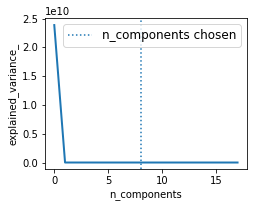

In [69]:
# http://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html

import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

logistic = linear_model.LogisticRegression()

pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

dataframe = loadData()
array = dataframe.values
clen = len(dataframe.columns)-1
X = array[:,0:clen-1]
Y = array[:,clen]

# Plot the PCA spectrum
pca.fit(X)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

# Prediction
n_components = [3,8,10]
Cs = np.logspace(-4, 4, 3)

# Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_components,
                              logistic__C=Cs))
estimator.fit(X, Y)

plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))
plt.show()

In [71]:
# https://machinelearningmastery.com/feature-selection-machine-learning-python/

import math
from functools import reduce

def featureSelectionUST(dataframe):
    # Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
    import pandas
    import numpy
    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import chi2
    # load data
    array = dataframe.values
    clen = len(dataframe.columns)-1
    X = array[:,0:clen-1]
    Y = array[:,clen]
    # feature extraction
    test = SelectKBest(score_func=chi2, k=4)
    fit = test.fit(X, Y)
    # summarize scores
    numpy.set_printoptions(precision=3)
    scores = list(map(lambda x: 0 if math.isnan(x) else x, fit.scores_))
    totalScore = reduce(lambda x,y: x+y, scores)
    ratio = 100 / totalScore
    scoredColumns = [[dataframe.columns[i], int(s*ratio), s] for i,s in enumerate(scores)]
    scoredColumns = sorted(scoredColumns, key=lambda x: x[1], reverse=True)
    print(scoredColumns)
    features = fit.transform(X)
    # summarize selected features
    print(features[0:5,:])
    
def featureSelectionRFE(dataframe):
    from pandas import read_csv
    from sklearn.feature_selection import RFE
    from sklearn.linear_model import LogisticRegression
    # load data
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
    names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
    # load data
    array = dataframe.values
    clen = len(dataframe.columns)-1
    X = array[:,0:clen-1]
    Y = array[:,clen]
    # feature extraction
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=None, min_samples_split=2, 
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
                                 max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, 
                                 bootstrap=True, oob_score=False, n_jobs=1, random_state=None, 
                                 verbose=0, warm_start=False, class_weight=None) #LogisticRegression()
    rfe = RFE(model, 3)
    fit = rfe.fit(X, Y)
    print("Num Features: %d" % fit.n_features_)
    print("Selected Features: %s" % fit.support_)
    print("Feature Ranking: %s" % fit.ranking_)
    selected = [dataframe.columns[i] for i,x in filter(lambda x: x[1] == True, enumerate(fit.support_))]
    print(selected)

def featureSelectionETC(dataframe):
    # Feature Importance with Extra Trees Classifier
    from pandas import read_csv
    from sklearn.ensemble import ExtraTreesClassifier
    # load data
    array = dataframe.values
    clen = len(dataframe.columns)-1
    X = array[:,0:clen-1]
    Y = array[:,clen]
    # feature extraction
    model = ExtraTreesClassifier()
    model.fit(X, Y)
    scores = list(map(lambda x: 0 if math.isnan(x) else x, model.feature_importances_))
    totalScore = reduce(lambda x,y: x+y, scores)
    ratio = 100 / totalScore
    scoredColumns = [[dataframe.columns[i], int(s*ratio), s] for i,s in enumerate(scores)]
    scoredColumns = sorted(scoredColumns, key=lambda x: x[1], reverse=True)
    print(scoredColumns)
    
data = loadData()
featureSelectionUST(data)
#featureSelectionRFE(data)
#featureSelectionETC(data)

[['AgencyCode', 92, 97976194.921675488], ['PrisSEK', 3, 3832335.0484344563], ['FIATA', 2, 3093675.8935675966], ['CompanyNumber', 0, 237102.56379090052], ['Carrier', 0, 277241.61121014354], ['BookingMonth', 0, 13.082073848494645], ['BookingWeekDay', 0, 85.061429487969193], ['Release', 0, 157532.51801271469], ['DepartureWeekDay', 0, 22.805901528398969], ['DepartureMonth', 0, 3539.062773671958], ['DepartureDay', 0, 62.999678214038887], ['Adults', 0, 161.60387313117963], ['Children', 0, 723.19614934230549], ['Paxes', 0, 0.0], ['NumberOfInf', 0, 5680.2002649708529], ['IsOneWay', 0, 139.1129383304054], ['TIATA', 0, 697126.08764192974], ['DirectFlight', 0, 0]]
[[   1100.    1799.    1246.  125266.]
 [   1100.    1799.     945.  125266.]
 [   1100.    1799.    1246.  125266.]
 [   1100.    1799.     945.  125266.]
 [   1100.    1799.    1246.  125266.]]


In [73]:
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

dataframe = loadData()
array = dataframe.values
clen = len(dataframe.columns)-1
X = array[:,0:clen-1]
y = array[:,clen]


rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X, y)
print(CV_rfc.best_params_)

{'max_features': 'auto', 'n_estimators': 700}


# The predictor
Your method mjust return a Predictor object

In [2]:
import sys
sys.path.append("../../sdk")
from saimon import Predictor
# USAGE return Predictor(model, train_x.columns) 

## Do your magic here!!

In [3]:
# Apply any data transformation here
def transform(data):
    return data

In [4]:
import multiprocessing
manager = multiprocessing.Manager()
return_dict = manager.dict()

def asyncBuild(name, modelbuilder):
    log("Building: %s " % name)
    return_dict[name] = modelbuilder()

    
def getResult(task):
    return task.join()


# Build as many models you want and see them compete to each other
def buildModels(train_x, train_y):
    models =[
        # Add one or more models to train and test here!
        #KNeighborsClassifier(train_x, train_y),
        multiprocessing.Process(target=asyncBuild, args=('RandomForest_gini', 
                                                        lambda: RandomForestClassifierModel(train_x, train_y, 'gini'))),
        multiprocessing.Process(target=asyncBuild, args=('RandomForest_entropy', 
                                                         lambda: RandomForestClassifierModel(train_x, train_y, 'entropy')))
        #SVCModel(train_x, train_y),
        #GaussianNBModel(train_x, train_y),
        #NuSVCModel(train_x, train_y),
        #['DecisionTreeClassifier', DecisionTreeClassifier(train_x, train_y)],
        #['AdaBoostDecisionTree_gini', AdaBoostDecisionTreeClassifierModel(train_x, train_y, criterion='gini')],
        #['AdaBoostDecisionTree_entropy', AdaBoostDecisionTreeClassifierModel(train_x, train_y, criterion='entropy')],
        #['AdaBoostRandomForest', AdaBoostRandomForestClassifierModel(train_x, train_y)]
        #['NNClassificationLearner', NNClassificationLearnerModel(train_x, train_y)]
        # LogisticRegressionModel(train_x, train_y)
        #,Auto_MLClassifierModel(train_x, train_y)
    ]
    [t.start() for t in models]
    [t.join() for t in models]
    return [[key, return_dict[key]] for key in return_dict.keys()]

In [5]:
def NNClassificationLearnerModel(train_x, train_y):
    from Orange.classification import NNClassificationLearner
    model = NNClassificationLearner(hidden_layer_sizes=(100, ), activation='relu', solver='adam', 
                            alpha=0.0001, batch_size='auto', learning_rate='constant', 
                        learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, 
                        random_state=None, tol=0.0001, verbose=False, warm_start=False, 
                        momentum=0.9, nesterovs_momentum=True, early_stopping=False, 
                        validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, preprocessors=None)

    model.fit(train_x, train_y)
    return model

def SVCModel(train_x, train_y):
    from sklearn import svm
    model = svm.SVC()
    model.fit(train_x, train_y)
    return model

def NuSVCModel(train_x, train_y):
    from sklearn.svm import NuSVC
    model = svm.NuSVC()
    model.fit(train_x, train_y)
    return model


def GaussianNBModel(train_x, train_y):
    from sklearn.naive_bayes import GaussianNB
    model = GaussianNB()
    model.fit(train_x, train_y)
    return model

def LogisticRegressionModel(train_x, train_y):
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression()
    model.fit(train_x, train_y)
    return model

def KNeighborsClassifierModel(train_x, train_y):
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier()
    knn.fit(train_x, train_y) 
    KNeighborsClassifier(algorithm='auto', leaf_size=300, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')
    return knn

def RandomForestClassifierModel(train_x, train_y, criterion='gini'):
    from sklearn.ensemble import RandomForestClassifier
    clf = RandomForestClassifier(n_estimators=700, criterion=criterion, max_depth=None, min_samples_split=2, 
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
                                 max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, 
                                 bootstrap=True, oob_score=False, n_jobs=1, random_state=None, 
                                 verbose=0, warm_start=False, class_weight=None)
    clf.fit(train_x, train_y)
    return clf

def DecisionTreeClassifier(train_x, train_y):
    from sklearn.tree import DecisionTreeClassifier
    clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, 
                                                      min_samples_split=2, min_samples_leaf=1, 
                                                      min_weight_fraction_leaf=0.0, max_features=None, 
                                                      random_state=None, max_leaf_nodes=None, 
                                                      min_impurity_decrease=0.0, min_impurity_split=None, 
                                                      class_weight=None, presort=False)
    clf.fit(train_x, train_y)
    return clf

def AdaBoostDecisionTreeClassifierModel(train_x, train_y, criterion='gini'):
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import AdaBoostClassifier

    # Create the dataset
    rng = np.random.RandomState(1)
    model = AdaBoostClassifier(DecisionTreeClassifier(criterion=criterion, splitter='best', max_depth=None, 
                                                      min_samples_split=2, min_samples_leaf=1, 
                                                      min_weight_fraction_leaf=0.0, max_features=None, 
                                                      random_state=None, max_leaf_nodes=None, 
                                                      min_impurity_decrease=0.0, min_impurity_split=None, 
                                                      class_weight=None, presort=False),
                         algorithm="SAMME.R",
                         n_estimators=500)
    model.fit(train_x, train_y)
    return model

def AdaBoostRandomForestClassifierModel(train_x, train_y, criterion='gini'):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import AdaBoostClassifier

    # Create the dataset
    rng = np.random.RandomState(1)
    model = AdaBoostClassifier(RandomForestClassifier(n_estimators=300, criterion=criterion, max_depth=None, min_samples_split=2, 
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
                                 max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, 
                                 bootstrap=True, oob_score=False, n_jobs=1, random_state=None, 
                                 verbose=0, warm_start=False, class_weight=None),
                         algorithm="SAMME.R",
                         n_estimators=50,
                        )
    model.fit(train_x, train_y)
    return model
    
def AutoSklearnClassifierModel(train_x, train_y):
    import autosklearn.classification
    import sklearn.model_selection
    import sklearn.datasets
    import sklearn.metrics
    automl = autosklearn.classification.AutoSklearnClassifier()
    automl.fit(train_x, train_y)
    return automl

def Auto_MLClassifierModel(train_x, train_y):
    from auto_ml import Predictor
    df = train_x
    df['target'] = train_y
    column_descriptions = {
        'target': 'output'
    }
    for col in train_x.columns:
        if not 'target' in col: 
            column_descriptions[col] = 'categorical'
    ml_predictor = Predictor(type_of_estimator='classifier', 
                             column_descriptions=column_descriptions)
    prediction_interval_params = {
        'learning_rate':-0.226
    }
    ml_predictor.train(df, ml_for_analytics=True,prediction_interval_params=prediction_interval_params)
    return ml_predictor


## Loading and scoring the data

In [ ]:
# Build as many models you want and see them compete to each other
def buildModelsAndTest(train):
    train_x = train.copy().drop(train.columns[-1], 1)
    train_y = train[train.columns[-1]]
    
    models = buildModels(train_x, train_y)
    
    def trainModel(name, model):
        log("Training %s" % name)
        return (name, Predictor(model, train.columns[:-1]))
    predictors = [trainModel(name, model) for name, model in models]
    log("Training done!")
    return predictors

def magic(train, test):
    # This method must return a model compatible with scikit-learn `predict`
    score = 0
    models = buildModelsAndTest(train)
    def testModel(name, model):
        testc = test.copy().drop(test.columns[-1], 1)        
        prediction = model.predict(testc)
        target = [(i,r) for i,r in enumerate(test[test.columns[-1]])]
        match = len(list(filter(lambda x: prediction[x[0]] == x[1], target)))
        score = 1 / len(target) * match
        return (name, model, score)
    return [testModel(name, model) for name, model in models]
    
def run():
    # Laad data
    log("Load data")
    data = loadData()

    dataset = {
                #'FullModel': data.columns,
                'featureSelectionUST_v0': ['AgencyCode', 'FIATA', 'CompanyNumber', 'Target'],
                'featureSelectionUST_v1': ['AgencyCode', 'FIATA', 'PrisSEK', 'CompanyNumber', 'Carrier', 'Target'],
                #'featureSelectionUST_v2': ['AgencyCode', 'FIATA', 'CompanyNumber', 'Carrier', 'BookingMonth', 'Target'],
                #'featureSelectionUST_v3': ['AgencyCode', 'FIATA', 'PrisSEK', 'CompanyNumber', 'Carrier', 'NumberOfInf', 'Target'],
                'featureSelectionUST_v4': ['AgencyCode', 'FIATA', 'PrisSEK', 'CompanyNumber', 'Carrier', 'NumberOfInf', 'Paxes', 'Target'],
                'featureSelectionUST_v5': ['AgencyCode', 'FIATA', 'TIATA', 'PrisSEK', 'CompanyNumber', 'Carrier', 'NumberOfInf', 'Paxes', 'Target']
        
              }

    def runDS(ds, data, dataset):
        log(ds)
        # Split train and test
        columns = data[dataset[ds]]
        train, test = splitData(columns)
        log("Training on %d records, %d features" % (len(train), len(train.columns)-1))
        log("Test on %d records" % len(test))

        # 
        magics = magic(train, test)
        log("Testing models")
        for name, model, score in magics:
            modelname = 'Predictors/%s_%s.pk' % (ds, name)
            pickle.dump(model, open(modelname, 'wb'))
            print("%s score in random: %f" % (modelname, score))
    
    from concurrent.futures import ThreadPoolExecutor
    def tasks(dss):
        res = []
        with ThreadPoolExecutor(max_workers=4) as executor:
            for ds in dss:
                print("About going to run %s" % ds)
            res.append(executor.submit(runDS, ds, data, dataset)) 
        log([future.result() for future in res])
    
    for ds in dataset.keys():
        runDS(ds, data, dataset)
        
    
    #target = test.columns[-1]
    #for cls in set(test[target]):
    #    model, score = magic(train, test[test[target] == cls])
    #    print("Score for class %s: %f" % (str(cls), score))

if __name__ == '__main__':
    run()
    log("Done!")

11:57:23: Load data
11:57:23: featureSelectionUST_v0
11:57:23: Training on 101565 records, 3 features
11:57:23: Test on 25391 records
11:57:23: Building: RandomForest_gini 
11:57:23: Building: RandomForest_entropy 
11:57:47: Training RandomForest_gini
11:57:47: Training RandomForest_entropy
11:57:47: Training done!
11:57:50: Testing models
Predictors/featureSelectionUST_v0_RandomForest_gini.pk score in random: 0.667520
Predictors/featureSelectionUST_v0_RandomForest_entropy.pk score in random: 0.667520
11:57:51: featureSelectionUST_v1
11:57:51: Training on 101565 records, 5 features
11:57:51: Test on 25391 records
11:57:51: Building: RandomForest_gini 
11:57:51: Building: RandomForest_entropy 
